In [1]:
path = '../DataCampus_Project/'
data_path = path+'myspskills/Database/'

In [2]:
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import seaborn as sns

from pandas.plotting import scatter_matrix
import scipy
import scipy.stats

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets.samples_generator import make_blobs

import csv
import importlib
import importlib.util
import numpy as mp
import matplotlib.pyplot as plt
import pickle
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import os

In [3]:
os.listdir(data_path)

['datacorrP.csv',
 'datanewchi.csv',
 'datanewchi22.csv',
 'datanewchi33.csv',
 'datanewchi44.csv',
 'MLENGLISH.csv',
 'stats.csv']

In [67]:
pa1=data_path+"MLENGLISH.csv"
pa2=data_path+"stats.csv"
pa3=data_path+"datacorrP.csv"
pa4=data_path+"datanewchi.csv"
pa5=data_path+"datanewchi22.csv"
pa6=data_path+"datanewchi33.csv"
pa7=data_path+"datanewchi44.csv"


In [5]:
ns=['average_syll_pause_duration','No._long_pause','speaking_time','ave_No._of_words_in_minutes','articulation_rate','No._words_in_minutes','formants_index','f0_index','f0_quantile_25_index','f0_quantile_50_index','f0_quantile_75_index','f0_std','f0_max','f0_min','No._detected_vowel','perc%._correct_vowel','(f2/f1)_mean','(f2/f1)_std','no._of_words','no._of_pauses','intonation_index','(voiced_syll_count)/(no_of_pause)','TOEFL_Scale_Score','Prosody_CFER_Score','Score_Shannon_index','CEFR_Scale_Score','speaking_rate']
print(f"ns_num:{len(ns)}")

ns_num:27


In [6]:
names= ['avepauseduratin','avelongpause','speakingtot','avenumberofwords','articulationrate','inpro','f1norm','mr','q25','q50','q75','std','fmax','fmin','vowelinx1','vowelinx2','formantmean','formantstd','nuofwrds','npause','ins', 'fillerratio','xx','xxx','totsco','xxban','speakingrate']

In [7]:
seed = 7
np.random.seed(seed)

dataset = pd.read_csv(pa1, names=ns)   

In [8]:
dataset 

,average_syll_pause_duration,No._long_pause,speaking_time,ave_No._of_words_in_minutes,articulation_rate,No._words_in_minutes,formants_index,f0_index,f0_quantile_25_index,f0_quantile_50_index,...,(f2/f1)_std,no._of_words,no._of_pauses,intonation_index,(voiced_syll_count)/(no_of_pause),TOEFL_Scale_Score,Prosody_CFER_Score,Score_Shannon_index,CEFR_Scale_Score,speaking_rate
0,1.345469,14.146939,25.39,2.759183,5.000000,134.060927,327.060000,1.427152,1.442503,311.507886,...,1.339032,63,4,5,27.500000,27,c,3.560,C,4.000000
1,0.706413,6.588333,45.17,2.412846,4.000000,104.024006,350.131240,0.754461,0.705353,151.092719,...,0.515103,91,21,4,7.571429,19,b2,2.352,B1,3.000000
2,0.320000,26.667211,26.67,3.113452,5.000000,182.323865,327.060000,0.985886,1.065282,203.190199,...,1.263305,81,2,7,70.500000,29,a,3.800,C,5.000000
3,0.320000,23.413333,23.41,2.613084,5.000000,154.642212,327.060000,1.084358,1.171889,224.910903,...,1.460528,60,1,7,105.000000,27,a,3.520,C,4.000000
4,0.707347,11.142081,82.06,2.548603,4.000000,123.792890,374.978167,0.971324,0.883852,184.611225,...,0.743561,184,24,10,13.333333,27,c,3.585,C,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0.985505,5.386570,101.10,2.315692,4.029304,90.134769,384.792245,0.914252,0.953614,104.691732,...,0.697130,202,48,9,7.333333,21,b2,2.760,B2,2.613908
693,0.888250,6.589558,66.85,2.325285,4.045997,91.777713,371.346505,0.965470,1.015431,111.533867,...,1.053679,131,33,7,6.909091,20,b2,2.560,B2,2.661554
694,0.859733,5.629217,100.91,2.266337,3.943426,95.347470,338.641588,1.056212,1.146060,124.225951,...,0.910697,206,45,7,7.955556,21,b2,2.690,B2,2.765077
695,0.985988,6.981187,153.66,2.229577,3.879463,92.613431,383.303023,1.032041,1.107223,120.378514,...,0.845186,302,61,7,8.606557,19,b2,2.340,B1,2.685789


In [9]:
dataset.describe()

,average_syll_pause_duration,No._long_pause,speaking_time,ave_No._of_words_in_minutes,articulation_rate,No._words_in_minutes,formants_index,f0_index,f0_quantile_25_index,f0_quantile_50_index,...,perc%._correct_vowel,(f2/f1)_mean,(f2/f1)_std,no._of_words,no._of_pauses,intonation_index,(voiced_syll_count)/(no_of_pause),TOEFL_Scale_Score,Score_Shannon_index,speaking_rate
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,...,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,0.871169,11.884827,61.873257,2.511293,4.356201,105.723407,368.303160,0.961359,0.916074,174.868718,...,0.608548,2.488183,0.720310,132.730273,25.539455,7.127690,10.302043,21.968436,2.868628,3.082426
std,0.461662,10.646642,38.273638,0.232847,0.501809,21.084761,21.408254,0.118569,0.157788,37.224661,...,0.170517,0.285828,0.182943,87.775439,14.871923,1.637227,9.740953,4.668509,0.611923,0.678322
min,0.320000,2.261335,7.540000,1.561507,3.000000,28.001080,327.060000,0.715040,0.522027,94.133914,...,0.061224,1.570232,0.299596,15.000000,1.000000,4.000000,1.625000,9.000000,1.076000,1.000000
25%,0.663463,5.881283,29.070000,2.367730,4.000000,93.903855,352.338291,0.888699,0.812169,151.301479,...,0.478261,2.278626,0.601991,59.000000,13.000000,6.000000,6.551724,20.000000,2.520000,3.000000
50%,0.766401,8.383722,54.240000,2.523156,4.000000,108.128925,373.802161,0.957604,0.914876,180.324143,...,0.600000,2.512143,0.696301,113.000000,23.000000,7.000000,8.450000,22.000000,2.895000,3.000000
75%,0.913247,13.086939,85.220000,2.651778,5.000000,119.951211,386.786973,1.024968,1.036024,199.340724,...,0.740741,2.686974,0.803898,181.000000,35.000000,8.000000,11.368421,26.000000,3.320000,3.378208
max,4.689212,113.153333,225.310000,3.352953,6.000000,190.560794,399.660992,1.427152,1.442503,313.603939,...,0.970588,3.615240,2.107763,489.000000,93.000000,10.000000,125.500000,29.000000,3.960000,6.000000


In [13]:
dataset = pd.read_csv(pa1, names=names)

In [14]:
dataset

,avepauseduratin,avelongpause,speakingtot,avenumberofwords,articulationrate,inpro,f1norm,mr,q25,q50,...,formantstd,nuofwrds,npause,ins,fillerratio,xx,xxx,totsco,xxban,speakingrate
0,1.345469,14.146939,25.39,2.759183,5.000000,134.060927,327.060000,1.427152,1.442503,311.507886,...,1.339032,63,4,5,27.500000,27,c,3.560,C,4.000000
1,0.706413,6.588333,45.17,2.412846,4.000000,104.024006,350.131240,0.754461,0.705353,151.092719,...,0.515103,91,21,4,7.571429,19,b2,2.352,B1,3.000000
2,0.320000,26.667211,26.67,3.113452,5.000000,182.323865,327.060000,0.985886,1.065282,203.190199,...,1.263305,81,2,7,70.500000,29,a,3.800,C,5.000000
3,0.320000,23.413333,23.41,2.613084,5.000000,154.642212,327.060000,1.084358,1.171889,224.910903,...,1.460528,60,1,7,105.000000,27,a,3.520,C,4.000000
4,0.707347,11.142081,82.06,2.548603,4.000000,123.792890,374.978167,0.971324,0.883852,184.611225,...,0.743561,184,24,10,13.333333,27,c,3.585,C,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0.985505,5.386570,101.10,2.315692,4.029304,90.134769,384.792245,0.914252,0.953614,104.691732,...,0.697130,202,48,9,7.333333,21,b2,2.760,B2,2.613908
693,0.888250,6.589558,66.85,2.325285,4.045997,91.777713,371.346505,0.965470,1.015431,111.533867,...,1.053679,131,33,7,6.909091,20,b2,2.560,B2,2.661554
694,0.859733,5.629217,100.91,2.266337,3.943426,95.347470,338.641588,1.056212,1.146060,124.225951,...,0.910697,206,45,7,7.955556,21,b2,2.690,B2,2.765077
695,0.985988,6.981187,153.66,2.229577,3.879463,92.613431,383.303023,1.032041,1.107223,120.378514,...,0.845186,302,61,7,8.606557,19,b2,2.340,B1,2.685789


In [15]:
print(dataset.groupby('speakingrate').size())
print(dataset.groupby('articulationrate').size())
print(dataset.groupby('vowelinx2').size())
print(dataset.groupby('formantmean').size())
print(dataset.groupby('formantstd').size())
print(dataset.groupby('xxban').size())

speakingrate
1.000000     14
1.488506      1
1.842543      1
1.908205      1
2.000000     59
           ... 
4.000000    140
4.231086      1
4.240138      1
5.000000      6
6.000000      1
Length: 181, dtype: int64
articulationrate
3.000000    9
3.160710    1
3.467153    1
3.487072    1
3.553992    1
           ..
5.273732    1
5.347257    1
5.370397    1
5.457573    1
6.000000    3
Length: 179, dtype: int64
vowelinx2
0.061224    1
0.066667    2
0.071429    1
0.074074    1
0.111111    1
           ..
0.953846    1
0.956522    1
0.959184    1
0.962963    1
0.970588    1
Length: 429, dtype: int64
formantmean
1.570232    1
1.620871    1
1.654571    1
1.665146    1
1.683764    1
           ..
3.151504    1
3.220668    1
3.345931    1
3.372141    1
3.615240    1
Length: 692, dtype: int64
formantstd
0.299596    1
0.330113    1
0.394046    1
0.396544    1
0.398047    1
           ..
1.363538    1
1.378689    1
1.460528    1
1.615327    1
2.107763    1
Length: 692, dtype: int64
xxban
A1     14

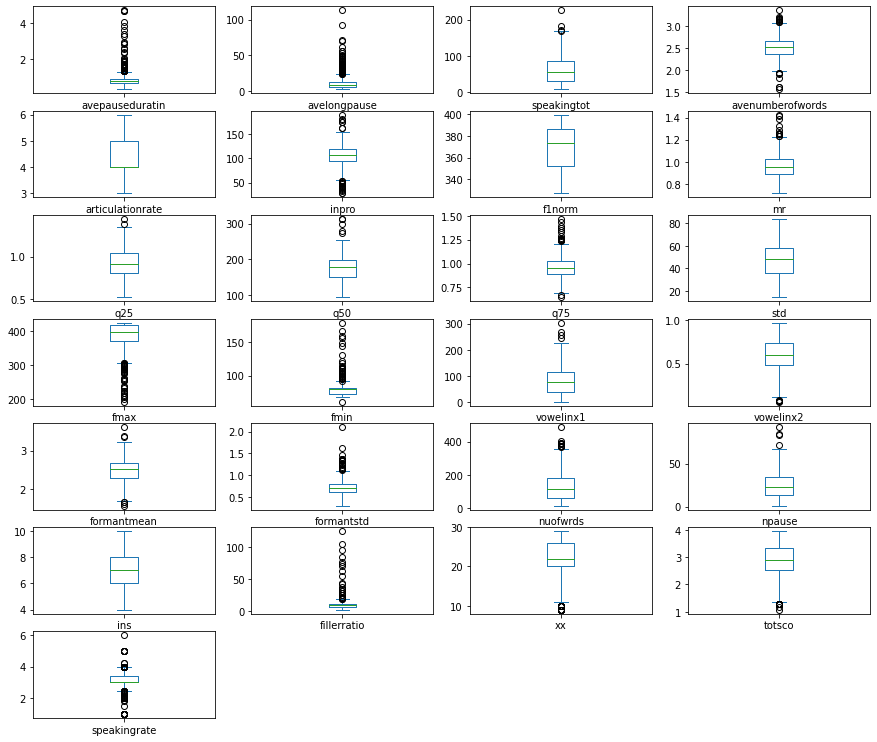

In [20]:
dataset.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

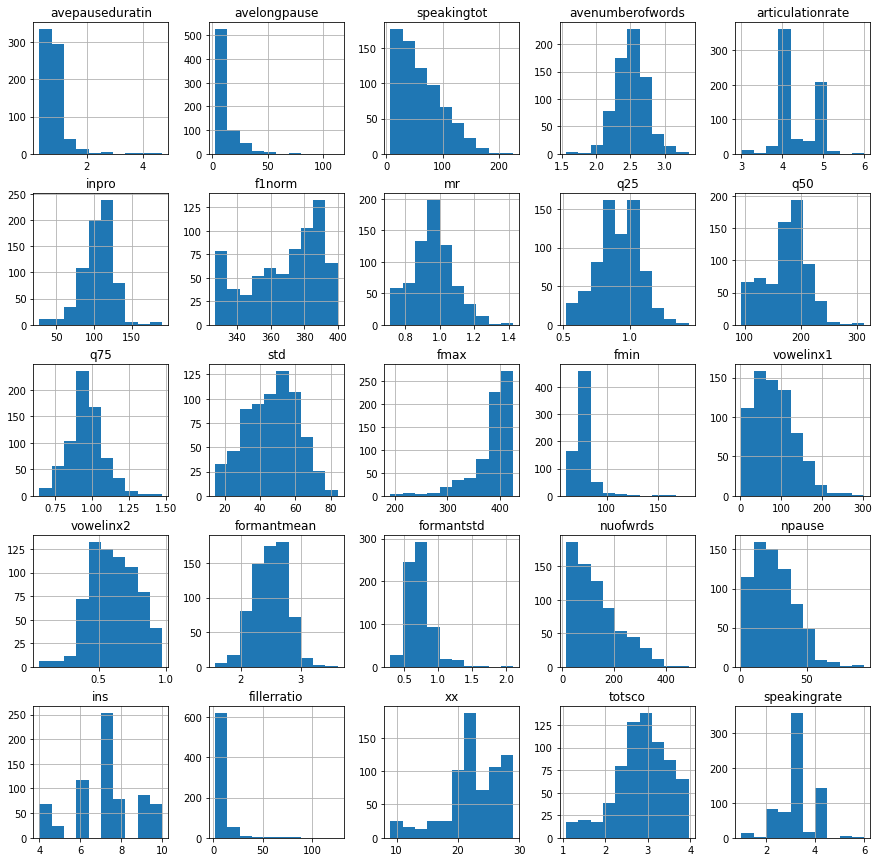

In [22]:
dataset.hist(figsize=(15,15))
plt.show()

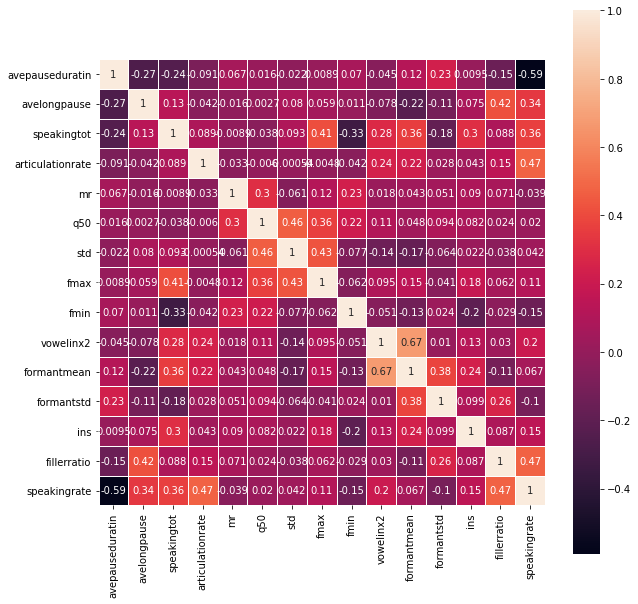

In [29]:
df = pd.read_csv(pa1,names = names)
corMx=df.drop(['avenumberofwords','f1norm','inpro','q25','q75','vowelinx1','nuofwrds','npause','xx','xxx','totsco','xxban'], axis=1).corr(method='pearson')
#print(corMx)
s = corMx.unstack()
so = s.sort_values(kind="quicksort")
#print(so)
plt.figure(figsize=(10,10))
sns.heatmap(corMx, annot = True, square = True, linewidth=1 )
plt.show()

In [33]:
so

speakingrate      avepauseduratin    -0.591597
avepauseduratin   speakingrate       -0.591597
speakingtot       fmin               -0.327985
fmin              speakingtot        -0.327985
avepauseduratin   avelongpause       -0.267630
                                        ...   
articulationrate  articulationrate    1.000000
speakingtot       speakingtot         1.000000
avelongpause      avelongpause        1.000000
fillerratio       fillerratio         1.000000
speakingrate      speakingrate        1.000000
Length: 225, dtype: float64

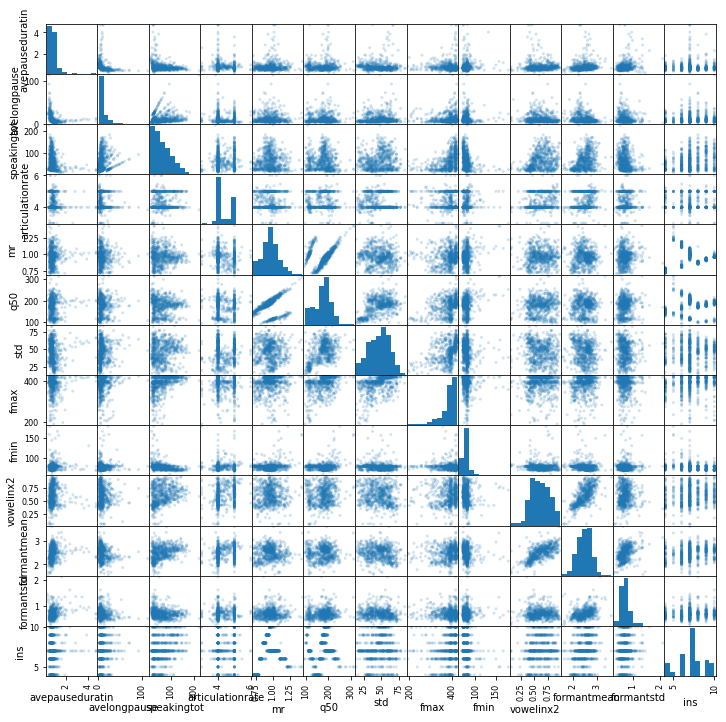

(697, 14)


In [36]:
newMLdataset=dataset.drop(['avenumberofwords','f1norm','inpro','q25','q75','vowelinx1','nuofwrds','npause','xx','totsco','xxban','speakingrate','fillerratio'], axis=1)

scatter_matrix(newMLdataset,alpha=0.2,figsize=(12,12)) # scatter plot matrix
plt.show()
print(newMLdataset.shape)

In [37]:
dfx= newMLdataset.drop(['xxx'],axis=1)
dfy= newMLdataset.drop(['avepauseduratin','avelongpause','speakingtot','articulationrate','mr',
                              'q50','std','fmax','fmin','vowelinx2','formantmean','formantstd','ins'],axis=1)

In [40]:
arrayy= dfy.values
array = dfx.values
array=np.log(array)
array=np.absolute(array)
X = array[:,0:12].astype(float)
Y = arrayy[:,0]
Y=Y.astype(str)

In [65]:
pd.DataFrame(Y).value_counts()

c     327
b2    256
b1     77
a2     17
a      13
a1      7
dtype: int64

In [45]:
model = Sequential()

#get number of columns in training data
n_cols = 12

#add model layers
model.add(Dense(500,input_shape=(n_cols,)))
keras.layers.LeakyReLU(alpha=0.03)
model.add(Dense(250))
keras.layers.LeakyReLU(alpha=0.05)
model.add(Dense(125))
keras.layers.LeakyReLU(alpha=0.1)
model.add(Dense(70))
keras.layers.LeakyReLU(alpha=0.6)
model.add(Dense(35,activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#Print model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               6500      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_3 (Dense)              (None, 70)                8820      
_________________________________________________________________
dense_4 (Dense)              (None, 35)                2485      
_________________________________________________________________
dense_5 (Dense)              (None, 15)                540       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [49]:
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
early_stopping_monitor = EarlyStopping(patience=400)


In [52]:
#history=model.fit(X, Y, validation_split=0.2, epochs=600, callbacks=[early_stopping_monitor])
# evaluate the model
#scores = model.evaluate(X,Y)
#plt.plot(history.history['mean_squared_error'])
#plt.show()
#print("#############################################")
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

### test dataset

In [54]:
namess=nms = ['avepauseduratin','avelongpause','speakingtot','articulationrate','mr','q50','std','fmax','fmin','vowelinx2','formantmean','formantstd','ins','xxx']

In [56]:
df3 = pd.read_csv(pa6, names = namess)
df33=df3.drop(['xxx'], axis=1)

array = df33.values
array=np.log(array)
array=np.absolute(array)
x = array[:,0:12]

In [61]:
x.shape

(1, 12)

In [ ]:
y= model.predict(x)
y=y[0]

if y>.55:
    yh="c"
    yH=(100-(0.6-y)*1000)
if y>.5 and y<=.55:
    yh="b2"
    yH=(100-(0.55-y)*1000)
if y>.4 and y<=.5:
    yh="b1"
    yH=(100-(0.5-y)*1000)
if y>.3 and y<=.4:
    yh="a2"
    yH=(100-(0.4-y)*1000)
if y>.2 and y<=.3:
    yh="a1"
    yH=(100-(0.3-y)*1000)
if y>=0 and y<=.2:
    yh="a"
    yH=(100-(0.2-y)*1000)

print("#############################################")
print("Probability %:    ",yH)
print("Your spoken language proficiency Level:  ",yh)


In [66]:
def myprosody(m,p):
    """
    Compared to native speech, here are the prosodic features of your speech
    """
    sound=p+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
    sourcerun=p+"/"+"dataset"+"/"+"essen"+"/"+"MLTRNL.praat"
    path=p+"/"+"dataset"+"/"+"audioFiles"+"/"
    outo=p+"/"+"dataset"+"/"+"datanewchi22.csv"
    outst=p+"/"+"dataset"+"/"+"datanewchi44.csv"
    outsy=p+"/"+"dataset"+"/"+"datanewchi33.csv"
    pa2=p+"/"+"dataset"+"/"+"stats.csv"
    pa7=p+"/"+"dataset"+"/"+"datanewchi44.csv" 
    result_array = np.empty((0, 100))
    files = glob.glob(path)
    result_array = np.empty((0, 27))
    try:
        objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
        z1=( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
        z3=z1.strip().split()
        z2=np.array([z3])
        result_array=np.append(result_array,[z3], axis=0)
        #print(z3)
        np.savetxt(outo,result_array, fmt='%s',delimiter=',')
        #Data and features analysis
        df = pd.read_csv(outo,
						 names = ['avepauseduratin','avelongpause','speakingtot','avenumberofwords','articulationrate','inpro','f1norm','mr','q25',
								  'q50','q75','std','fmax','fmin','vowelinx1','vowelinx2','formantmean','formantstd','nuofwrds','npause','ins',
								  'fillerratio','xx','xxx','totsco','xxban','speakingrate'],na_values='?')
        scoreMLdataset=df.drop(['xxx','xxban'], axis=1)
        scoreMLdataset.to_csv(outst, header=False,index = False)
        newMLdataset=df.drop(['avenumberofwords','f1norm','inpro','q25','q75','vowelinx1','nuofwrds','npause','xx','totsco','xxban','speakingrate','fillerratio'], axis=1)
        newMLdataset.to_csv(outsy, header=False,index = False)
        namess=nms = ['avepauseduratin','avelongpause','speakingtot','articulationrate','mr',
								  'q50','std','fmax','fmin','vowelinx2','formantmean','formantstd','ins',
								  'xxx']
        df1 = pd.read_csv(outsy, names = namess)
        nsns=['average_syll_pause_duration','No._long_pause','speaking_time','ave_No._of_words_in_minutes','articulation_rate','No._words_in_minutes','formants_index','f0_index','f0_quantile_25_index',
								  'f0_quantile_50_index','f0_quantile_75_index','f0_std','f0_max','f0_min','No._detected_vowel','perc%._correct_vowel','(f2/f1)_mean','(f2/f1)_std',
									'no._of_words','no._of_pauses','intonation_index',
						'(voiced_syll_count)/(no_of_pause)','TOEFL_Scale_Score','Score_Shannon_index','speaking_rate']
        dataframe = pd.read_csv(pa2)
        df55 = pd.read_csv(outst,names=nsns)
        dataframe=dataframe.values ## stats
        array = df55.values
        print("Compared to native speech, here are the prosodic features of your speech:")
        for i in range(25):
            sl0=dataframe[4:7:1,i+1]
            score = array[0,i]
            he=scipy.stats.percentileofscore(sl0, score, kind='strict')
            if he==0:
                he=25
                dfout = "%s:\t %f (%s)" %  (nsns[i],he,"% percentile ")
                print(dfout)
            elif he>=25 and he<=75:
                dfout = "%s:\t %f (%s)" % (nsns[i],he,"% percentile ")
                print(dfout)
            else:
                dfout = "%s:\t (%s)" % (nsns[i],":Out of Range")
                print(dfout)
    except:
        print ("Try again the sound of the audio was not clear")	
    

4     5.881283
5     8.383722
6    13.086939
Name: No._long_pause, dtype: float64